# PME3481 - Controle e Aplicações

## Projeto de Compensadores

### Preparação do Ambiente

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

### Análise de Estabilidade

In [18]:
def analyze_stability(G):
    gm, pm, wg, wp = ctl.margin(G)
    print(f'Gain Margin (GM): {gm} dB')
    print(f'Phase Margin (PM): {pm} degrees')
    print(f'Gain Crossover Frequency: {wg} rad/s')
    print(f'Phase Crossover Frequency: {wp} rad/s')
    
    # Bode plot
    mag, phase, omega = ctl.bode_plot(G, dB=True, Hz=False, deg=True, plot=False)
    plt.figure()
    plt.subplot(2, 1, 1)
    plt.semilogx(omega, 20 * np.log10(mag))
    plt.axvline(wg, color='r', linestyle='--', label='Gain Crossover Frequency')
    plt.ylabel('Magnitude (dB)')
    plt.title('Bode Plot')
    plt.grid(True)
    plt.legend()
    
    plt.subplot(2, 1, 2)
    plt.semilogx(omega, phase)
    plt.axvline(wp, color='r', linestyle='--', label='Phase Crossover Frequency')
    plt.axhline(-180 + pm, color='g', linestyle='--', label='Phase Margin')
    plt.xlabel('Frequency (rad/s)')
    plt.ylabel('Phase (deg)')
    plt.grid(True)
    plt.legend()
    plt.show()
    
    return gm, pm, wg, wp

### Análise de Estabilidade

Gain Margin (GM): 0.058604504728763565 dB
Phase Margin (PM): -71.70725140548602 degrees
Gain Crossover Frequency: 1.8708777672237018 rad/s
Phase Crossover Frequency: 10.88373153932199 rad/s


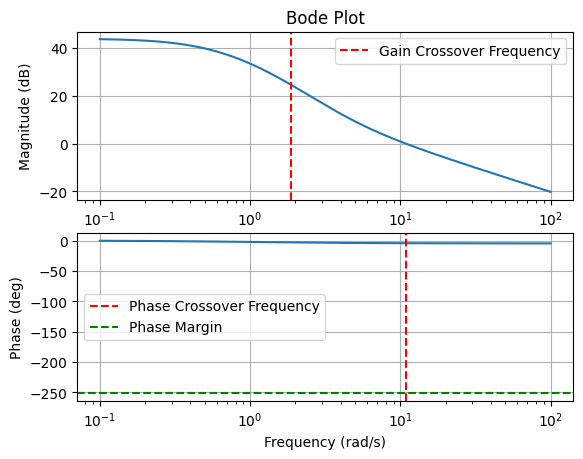

In [19]:
# Definindo a função de transferência G
num = [-9.793, -4.896, 157.7, 78.84]  # Numerador
den = [1, 4, 5.25, 2.75, 0.5]         # Denominador
G = ctl.TransferFunction(num, den)

# Analisando a estabilidade atual
gm, pm, wg, wp = analyze_stability(G)

## Compensador Lead

In [20]:
def design_lead_compensator(G, desired_pm_increase=30):
    gm, pm, wg, wp = analyze_stability(G)
    
    # Desired phase margin
    desired_pm = pm + desired_pm_increase
    alpha = (1 - np.sin(np.radians(desired_pm))) / (1 + np.sin(np.radians(desired_pm)))
    T = 1 / (wp * np.sqrt(alpha))
    
    # Lead compensator transfer function
    compensator = ctl.TransferFunction([T, 1], [alpha * T, 1])
    G_compensated = compensator * G
    
    return compensator, G_compensated

Gain Margin (GM): 0.058604504728763565 dB
Phase Margin (PM): -71.70725140548602 degrees
Gain Crossover Frequency: 1.8708777672237018 rad/s
Phase Crossover Frequency: 10.88373153932199 rad/s


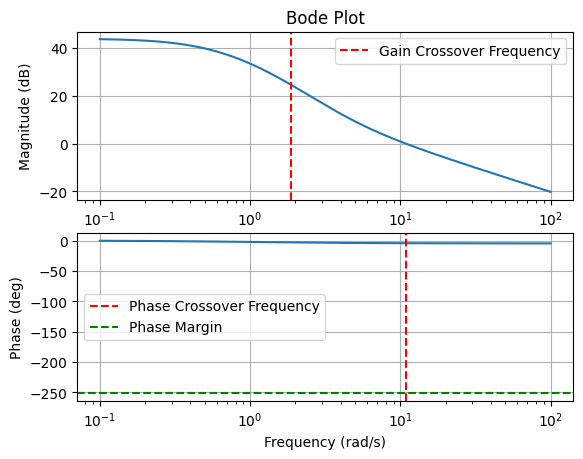

Compensador de Avanço projetado: 
0.02487 s + 1
-------------
0.3394 s + 1



In [21]:
# Projetando o compensador de avanço para aumentar a margem de fase em 30 graus
desired_pm_increase = 12
compensator, G_compensated = design_lead_compensator(G, desired_pm_increase)

# Exibindo o compensador projetado
print(f'Compensador de Avanço projetado: {compensator}')

# Plotando o Bode do sistema compensado
# analyze_stability(G_compensated)

Gain Margin (GM): 0.036648573692018724 dB
Phase Margin (PM): -112.32691037021388 degrees
Gain Crossover Frequency: 1.3520356971644905 rad/s
Phase Crossover Frequency: 5.951334515853139 rad/s


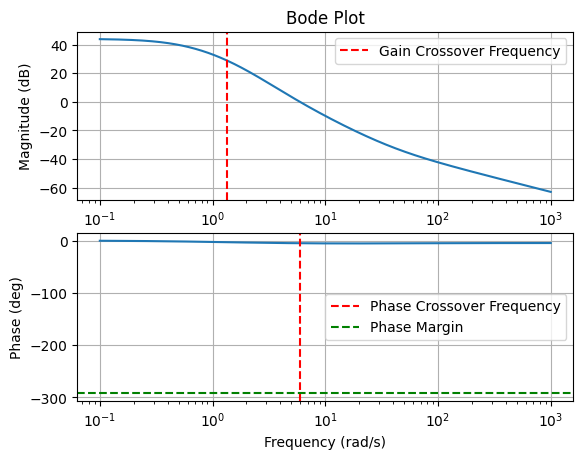

(0.036648573692018724,
 -112.32691037021388,
 1.3520356971644905,
 5.951334515853139)

In [22]:
analyze_stability(G_compensated)

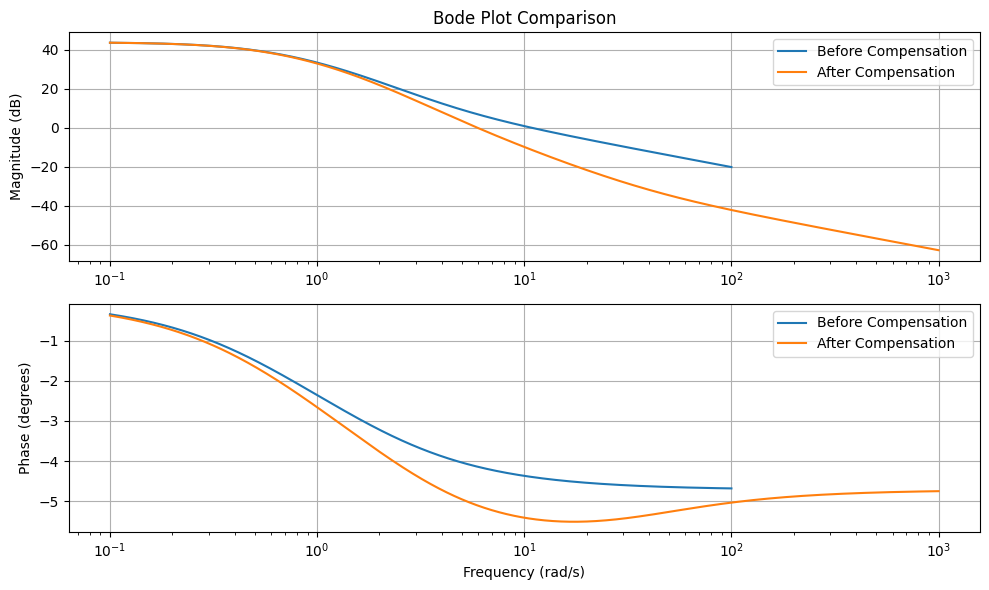

In [23]:
def plot_bode_comparison(G_before, G_after):
    mag_before, phase_before, omega_before = ctl.bode_plot(G_before, dB=True, Hz=False, deg=True, Plot=False)
    mag_after, phase_after, omega_after = ctl.bode_plot(G_after, dB=True, Hz=False, deg=True, Plot=False)
    
    plt.figure(figsize=(10, 6))
    
    # Plotando magnitude antes e depois do compensador
    plt.subplot(2, 1, 1)
    plt.semilogx(omega_before, 20 * np.log10(mag_before), label='Before Compensation')
    plt.semilogx(omega_after, 20 * np.log10(mag_after), label='After Compensation')
    plt.ylabel('Magnitude (dB)')
    plt.title('Bode Plot Comparison')
    plt.grid(True)
    plt.legend()
    
    # Plotando fase antes e depois do compensador
    plt.subplot(2, 1, 2)
    plt.semilogx(omega_before, phase_before, label='Before Compensation')
    plt.semilogx(omega_after, phase_after, label='After Compensation')
    plt.ylabel('Phase (degrees)')
    plt.xlabel('Frequency (rad/s)')
    plt.grid(True)
    plt.legend()
    
    plt.tight_layout()

# Plotando o diagrama de Bode comparativo antes e depois do compensador
plot_bode_comparison(G, G_compensated)
plt.show()